In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


<a id="1"></a>
## Loading the Data Set
* In this part we load and visualize the data.

In [ ]:
# read train
train = pd.read_csv("/content/drive/MyDrive/deeplearningContent/Section 2/input/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# read test
test= pd.read_csv("/content/drive/MyDrive/deeplearningContent/Section 2/input/test.csv")
print(test.shape)
test.head()

(28000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# put labels into y_train variable
Y_train = train["label"]
Y_test = test["label"]
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1)
X_test = test.drop(labels = ["label"], axis = 1)
print("X_train shape is: ", X_train.shape)
print("X_test shape is: ", X_test.shape)


X_train shape is:  (42000, 784)
X_test shape is:  (28000, 784)


In [ ]:
# plot some samples
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()

In [ ]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0
print("x_train shape: ",X_train.shape)
print("x_test shape: ",X_test.shape)

x_train shape:  (42000, 784)
x_test shape:  (28000, 784)


In [ ]:
# Reshape
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("x_test shape: ",X_test.shape)

x_train shape:  (42000, 28, 28, 1)
x_test shape:  (28000, 28, 28, 1)


In [ ]:
from keras.utils import to_categorical

# Assuming y_train is a NumPy array or list of class labels
Y_train = to_categorical(Y_train, num_classes=27)  # تحويل Y_train إلى One-Hot Encoding

# Display the one-hot encoded labels
print(Y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


<a id="3"></a>
## Train Test Split
* We split the data into train and test sets.
* test size is 10%.
* train size is 90%.

In [ ]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_val shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_val shape",Y_val.shape)


x_train shape (37800, 28, 28, 1)
x_val shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_val shape (4200, 10)


<a id="10"></a>
## Implementing with Keras

In [ ]:

import tensorflow as tf
from tensorflow.keras import layers
import os,random
print(tf.__version__)
from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam

model = Sequential()

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2))) # 5th Max-Pooling

model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(4096, activation='relu'))

# --- Output Layer ---
model.add(layers.Dense(27, activation='softmax'))

model.summary()

2.19.0


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 32)       │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,794 (245.29 KB)

 Trainable params: 62,794 (245.29 KB)

 Non-trainable params: 0 (0.00 B)

<a id="12"></a>
### Define Optimizer   
* Adam optimizer: Change the learning rate


In [ ]:
# Define the optimizer
optimizer = Adam(learning_rate=0.001)

In [ ]:
# Compile the model
model.compile(optimizer = optimizer ,
              loss = "categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
epochs = 50  # for better result increase the epochs
batch_size = 32

In [ ]:
# Fit the model
history = model.fit(X_train, Y_train, batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_val, Y_val))


Epoch 1/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7707 - loss: 0.6750 - val_accuracy: 0.9724 - val_loss: 0.0892
Epoch 2/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9722 - loss: 0.0933 - val_accuracy: 0.9836 - val_loss: 0.0540
Epoch 3/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9817 - loss: 0.0595 - val_accuracy: 0.9852 - val_loss: 0.0565
Epoch 4/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9849 - loss: 0.0474 - val_accuracy: 0.9864 - val_loss: 0.0481
Epoch 5/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9867 - loss: 0.0429 - val_accuracy: 0.9798 - val_loss: 0.0672
Epoch 6/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9899 - loss: 0.0325 - val_accuracy: 0.9845 - val_loss: 0.0558
Epoch 7/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9909 - loss: 0.0289 - val_accuracy: 0.9869 - val_loss: 0.0452
Epoch 8/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9916 - loss: 0.0250 -

<a id="17"></a>
### Evaluate the model
* Test Loss visualization
* Confusion matrix


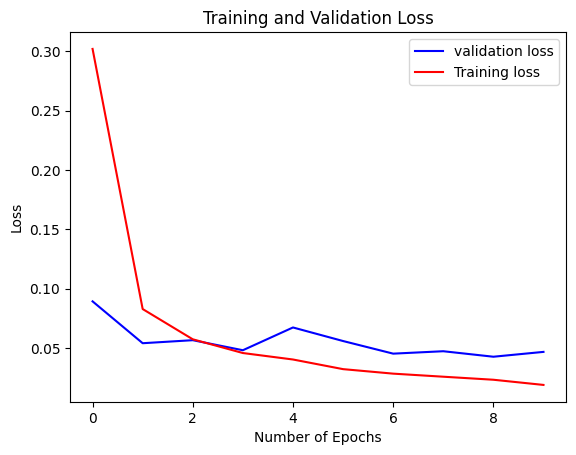

In [ ]:
# Plot the loss and accuracy curves for training and validation
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.plot(history.history['loss'], color='r', label="Training loss")
plt.title("Training and Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

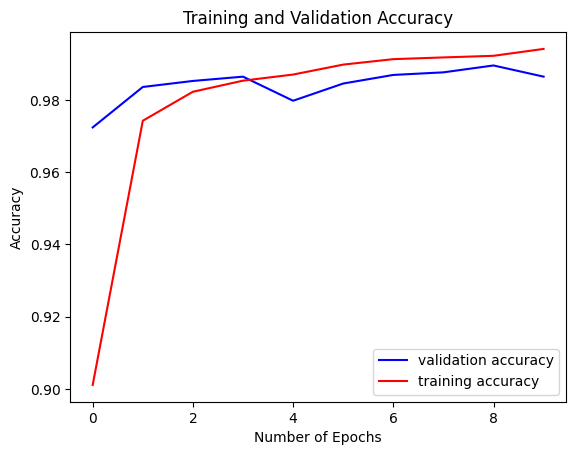

In [ ]:
# Plot the loss and accuracy curves for training and validation
plt.plot(history.history['val_accuracy'], color='b', label="validation accuracy")
plt.plot(history.history['accuracy'], color='r', label="training accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
predictions = model.predict(X_test)
print(predictions)
# # If you used softmax in your output layer, you might want to get the class with the highest probability
Y_pred = np.argmax(predictions, axis=1)
print(Y_pred)
accuracy = accuracy_score(Y_test, Y_pred)
print(accuracy)

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[[2.3916297e-15 4.3013781e-10 1.1789143e-09 ... 1.0000000e+00
  2.3253164e-09 1.4174772e-08]
 [1.3907669e-07 6.6192342e-07 9.9999726e-01 ... 8.6210061e-09
  1.5756086e-09 1.8561968e-11]
 [4.1504961e-07 9.9990678e-01 4.5531183e-07 ... 6.7929839e-05
  4.7179415e-06 2.0750460e-06]
 ...
 [1.9352766e-13 3.1724991e-11 8.4892056e-15 ... 5.5910211e-12
  1.9489939e-09 3.5350399e-07]
 [1.1966824e-08 6.0964248e-11 9.3394258e-11 ... 1.9554478e-15
  1.3685499e-07 8.1466865e-12]
 [1.5219243e-11 3.0484643e-10 1.6353030e-09 ... 3.6029768e-09
  1.0000000e+00 2.3661146e-09]]
[7 2 1 ... 5 6 8]
0.9865714285714285
